In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install segmentation_models rasterio geopandas contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 6.9 MB/s eta 0:00:00


In [ ]:

!pip install -U -q segmentation-models
!pip install -q tensorflow
!pip install -q keras
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow import keras
import pandas as pd
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

import sys
sys.path.append('/content/drive/MyDrive/Lecture')

import segmentation_models as sm

physical_devices = tf.config.experimental.list_physical_devices('GPU')

for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

if tf.test.gpu_device_name():

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [ ]:
X_train = np.load(f'/content/drive/MyDrive/Major Project/Data/Arrays/trainX.npy')
Y_train = np.load(f'/content/drive/MyDrive/Major Project/Data/Arrays/trainY.npy')
X_val = np.load(f'/content/drive/MyDrive/Major Project/Data/Arrays/valX.npy')
Y_val = np.load(f'/content/drive/MyDrive/Major Project/Data/Arrays/valY.npy')
X_test = np.load(f'/content/drive/MyDrive/Major Project/Data/Arrays/testX.npy')
Y_test = np.load(f'/content/drive/MyDrive/Major Project/Data/Arrays/testY.npy')
print("Shape of the training dataset (satellite image): ", X_train.shape)
print("Shape of the training dataset (label image): ",Y_train.shape)
print("Shape of the validation dataset (satellite image): ",X_val.shape)
print("Shape of the validation dataset (label image): ",Y_val.shape)
print("Shape of the testing dataset (satellite image): ",X_test.shape)
print("Shape of the testing dataset (label image): ",Y_test.shape)

Shape of the training dataset (satellite image):  (1119, 128, 128, 4)
Shape of the training dataset (label image):  (1119, 128, 128, 1)
Shape of the validation dataset (satellite image):  (284, 128, 128, 4)
Shape of the validation dataset (label image):  (284, 128, 128, 1)
Shape of the testing dataset (satellite image):  (355, 128, 128, 4)
Shape of the testing dataset (label image):  (355, 128, 128, 1)


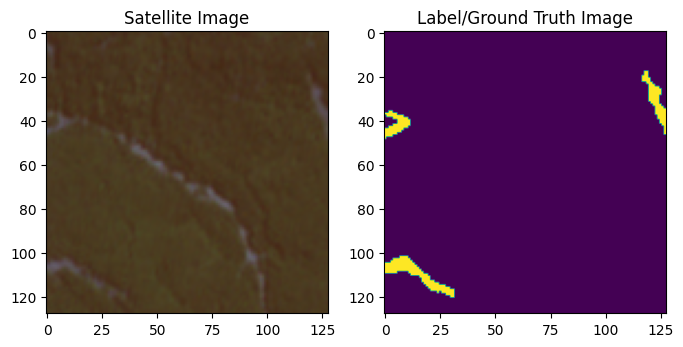

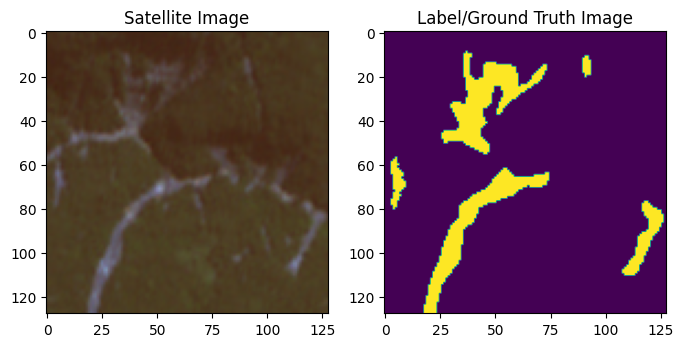

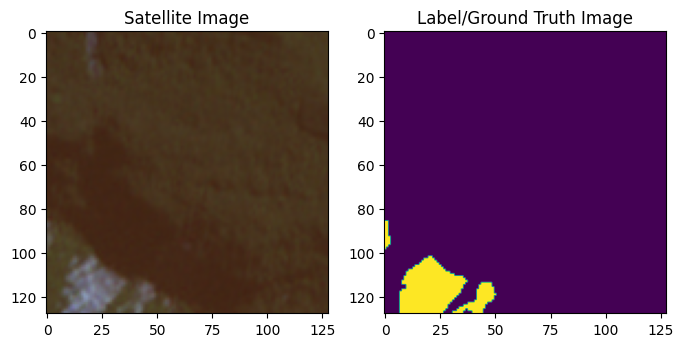

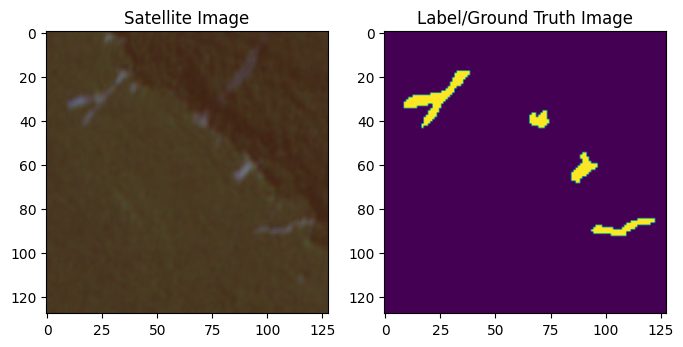

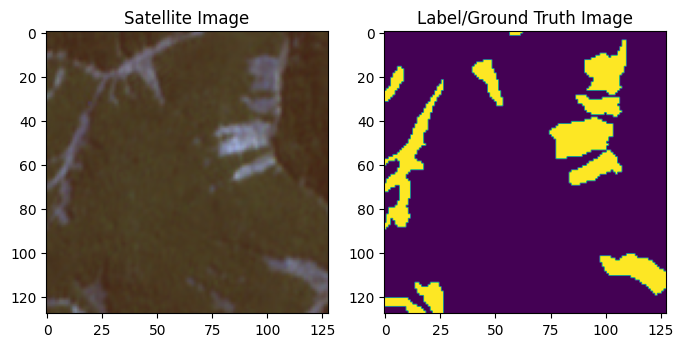

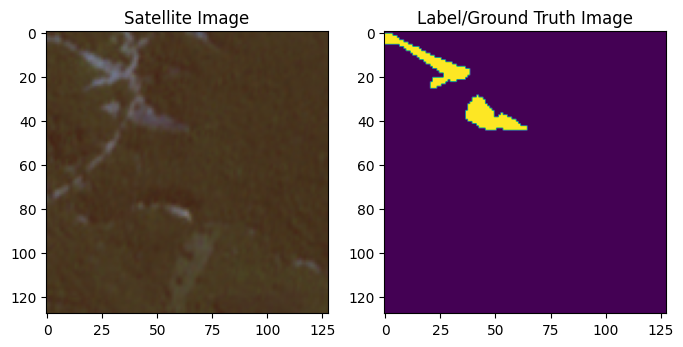

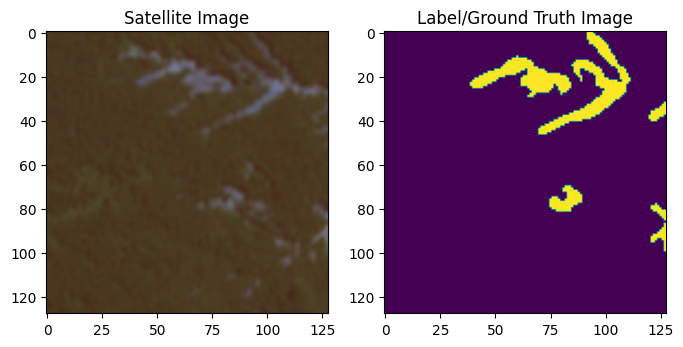

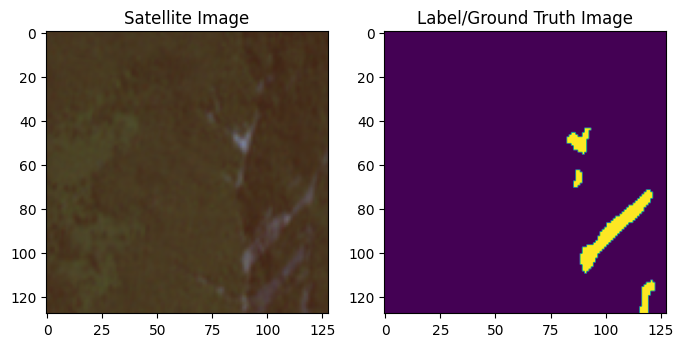

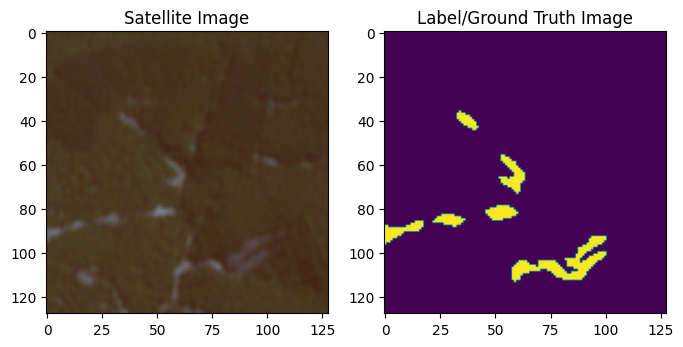

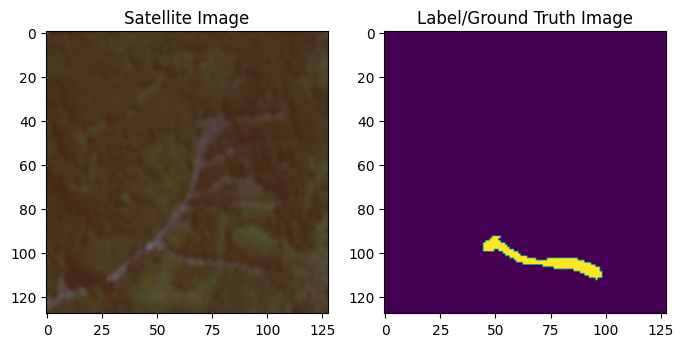

In [ ]:
for i in range(10):
    f, axarr = plt.subplots(1,2,figsize=(8,8))
    axarr[0].imshow(X_train[i][:,:,:3])
    axarr[0].set_title("Satellite Image")
    axarr[1].imshow(np.squeeze(Y_train[i]))
    axarr[1].set_title("Label/Ground Truth Image")

# # Number of images to display
# num_images = 60  # 10 rows * 6 columns

# # Create a figure with 3 rows and 6 columns
# fig, axarr = plt.subplots(10, 6, figsize=(18, 18))

# # Loop through the number of images to display
# for i in range(num_images):
#     # Determine the row and column index
#     row = i // 6
#     col = i % 6

#     # Display the satellite image
#     axarr[row, col].imshow(X_train[i][:,:,:3])
#     axarr[row, col].set_title("")
#     axarr[row, col].axis('off')  # Hide the axes for a cleaner look

# # Adjust layout and show the plot
# plt.tight_layout()
# plt.show()





In [ ]:
metrics = [sm.metrics.Precision(threshold=0.5),sm.metrics.Recall(threshold=0.5),sm.metrics.FScore(threshold=0.5,beta=1)]

In [ ]:
import tensorflow.keras.backend as K

smooth = 1

def dsc(y_true, y_pred):
    smooth = 1.
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    score = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return score

def dice_loss(y_true, y_pred):
    loss = 1 - dsc(y_true, y_pred)
    return loss

_______________________________________________________________________________
Filters:  32
Learning rate:  0.001
Batch size:  32
Epoch 1/200
28/28 [==============================] - 42s 730ms/step - loss: 0.6117 - precision: 0.4012 - recall: 0.6959 - f1-score: 0.4255 - val_loss: 0.5668 - val_precision: 0.3526 - val_recall: 0.7978 - val_f1-score: 0.4352
Epoch 2/200
28/28 [==============================] - 6s 198ms/step - loss: 0.3611 - precision: 0.5910 - recall: 0.7155 - f1-score: 0.6398 - val_loss: 0.6918 - val_precision: 0.2479 - val_recall: 0.8581 - val_f1-score: 0.3085
Epoch 3/200
28/28 [==============================] - 6s 200ms/step - loss: 0.3555 - precision: 0.6040 - recall: 0.7101 - f1-score: 0.6449 - val_loss: 0.5874 - val_precision: 0.3354 - val_recall: 0.7765 - val_f1-score: 0.4203
Epoch 4/200
28/28 [==============================] - 6s 204ms/step - loss: 0.3403 - precision: 0.6058 - recall: 0.7391 - f1-score: 0.6604 - val_loss: 0.5906 - val_precision: 0.3812 - val_recall

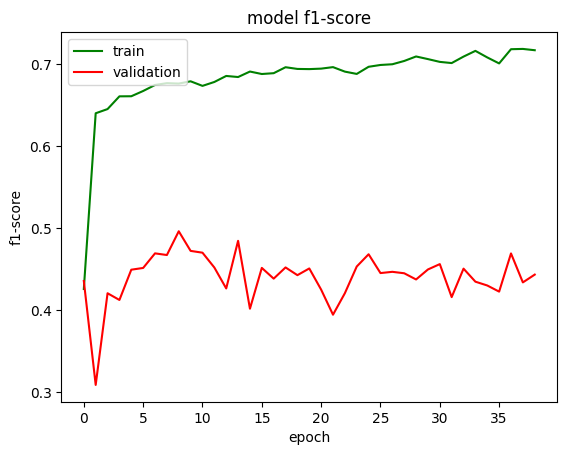

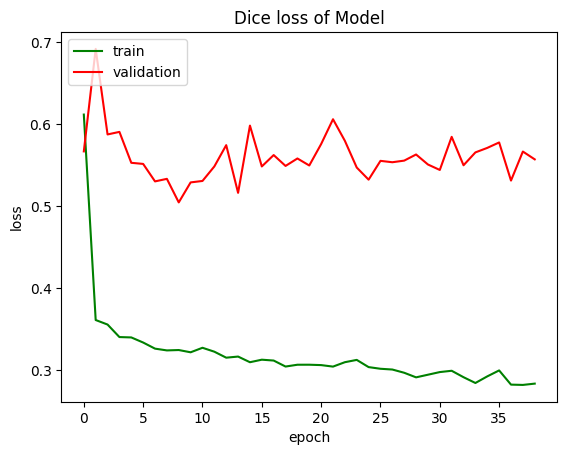

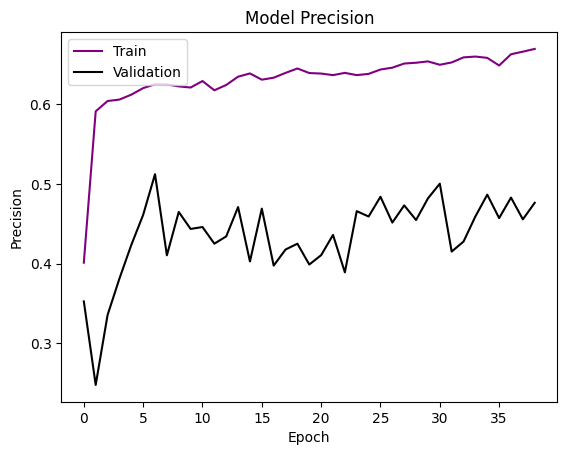

12/12 [==============================] - 2s 156ms/step - loss: 0.6933 - precision: 0.5037 - recall: 0.8787 - f1-score: 0.6221
_______________________________________________________________________________
Filters:  32
Learning rate:  0.001
Batch size:  64
Epoch 1/200
14/14 [==============================] - 52s 2s/step - loss: 0.7867 - precision: 0.1392 - recall: 0.9730 - f1-score: 0.2378 - val_loss: 0.7969 - val_precision: 0.2888 - val_recall: 0.7409 - val_f1-score: 0.4015
Epoch 2/200
14/14 [==============================] - 6s 406ms/step - loss: 0.5829 - precision: 0.4739 - recall: 0.7418 - f1-score: 0.5380 - val_loss: 0.5283 - val_precision: 0.4147 - val_recall: 0.5941 - val_f1-score: 0.4586
Epoch 3/200
14/14 [==============================] - 5s 389ms/step - loss: 0.3669 - precision: 0.5839 - recall: 0.7155 - f1-score: 0.6333 - val_loss: 0.5985 - val_precision: 0.2577 - val_recall: 0.8041 - val_f1-score: 0.3722
Epoch 4/200
14/14 [==============================] - 6s 404ms/step - l

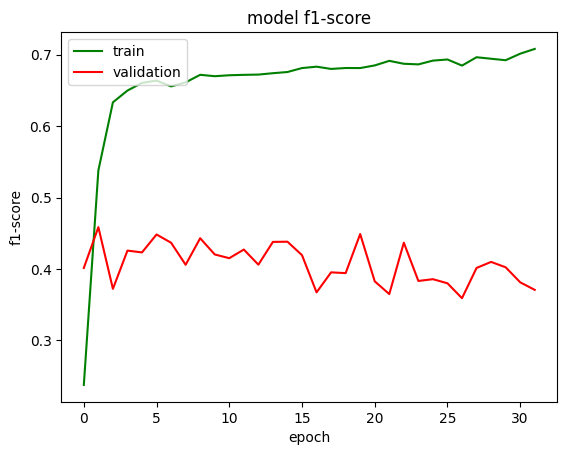

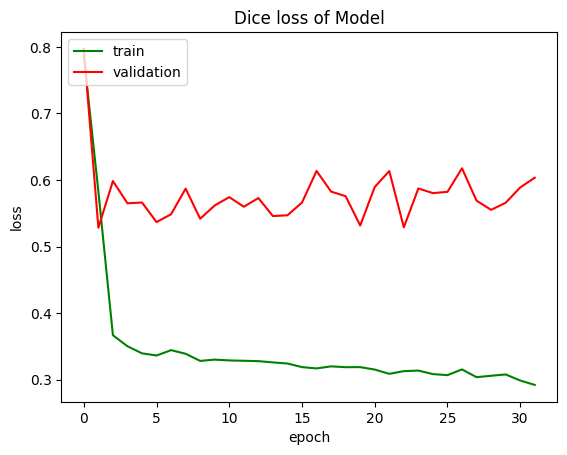

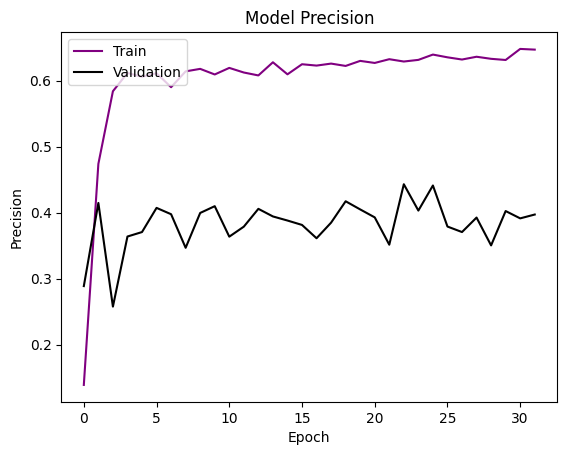

12/12 [==============================] - 1s 52ms/step - loss: 0.4261 - precision: 0.5912 - recall: 0.6460 - f1-score: 0.5913
_______________________________________________________________________________
Filters:  64
Learning rate:  0.001
Batch size:  32
Epoch 1/200
28/28 [==============================] - 82s 2s/step - loss: 0.7521 - precision: 0.2506 - recall: 0.9206 - f1-score: 0.3667 - val_loss: 0.7930 - val_precision: 0.2725 - val_recall: 0.9485 - val_f1-score: 0.3990
Epoch 2/200
28/28 [==============================] - 15s 519ms/step - loss: 0.7173 - precision: 0.4202 - recall: 0.9115 - f1-score: 0.5720 - val_loss: 0.7973 - val_precision: 0.2787 - val_recall: 0.9291 - val_f1-score: 0.3842
Epoch 3/200
28/28 [==============================] - 15s 524ms/step - loss: 0.7127 - precision: 0.4476 - recall: 0.9095 - f1-score: 0.5977 - val_loss: 0.8034 - val_precision: 0.2496 - val_recall: 0.9503 - val_f1-score: 0.3536
Epoch 4/200
28/28 [==============================] - 16s 592ms/step -

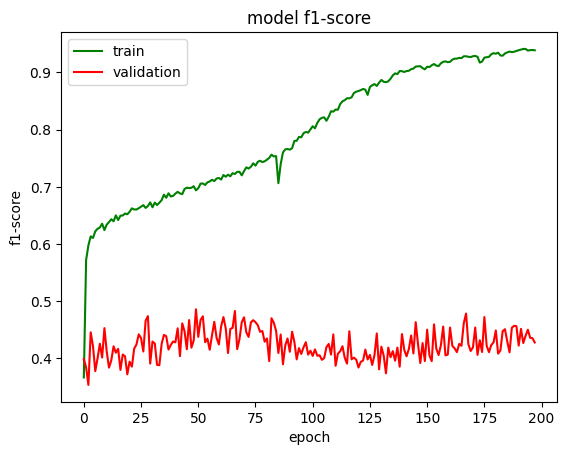

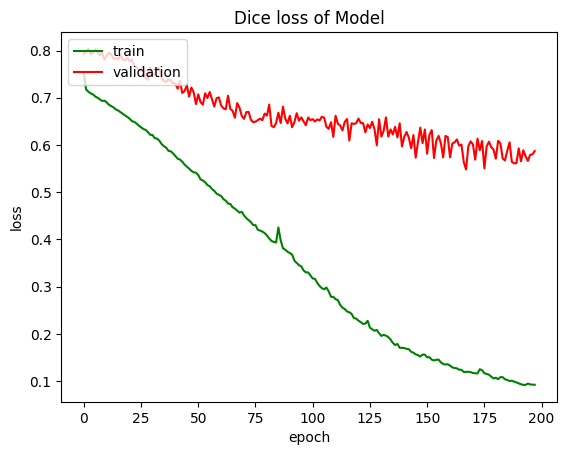

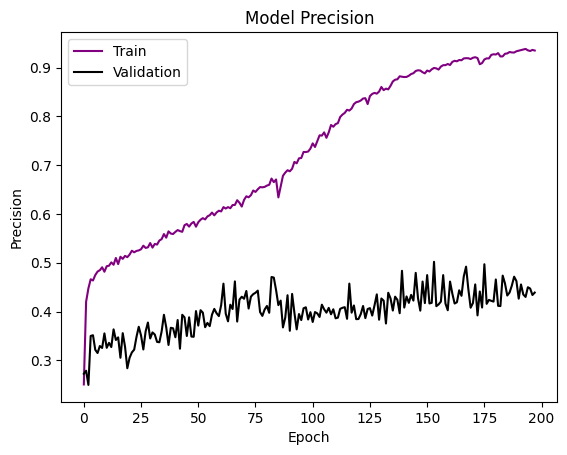

12/12 [==============================] - 4s 325ms/step - loss: 0.3646 - precision: 0.6171 - recall: 0.7119 - f1-score: 0.6314
_______________________________________________________________________________
Filters:  64
Learning rate:  0.001
Batch size:  64
Epoch 1/200
14/14 [==============================] - 114s 5s/step - loss: 0.8251 - precision: 0.1062 - recall: 0.9303 - f1-score: 0.1802 - val_loss: 0.8636 - val_precision: 0.0752 - val_recall: 1.0000 - val_f1-score: 0.1391
Epoch 2/200
14/14 [==============================] - 14s 1s/step - loss: 0.8247 - precision: 0.1063 - recall: 1.0000 - f1-score: 0.1919 - val_loss: 0.8635 - val_precision: 0.0752 - val_recall: 1.0000 - val_f1-score: 0.1391
Epoch 3/200
14/14 [==============================] - 14s 1s/step - loss: 0.8247 - precision: 0.1063 - recall: 1.0000 - f1-score: 0.1918 - val_loss: 0.8634 - val_precision: 0.0752 - val_recall: 1.0000 - val_f1-score: 0.1391
Epoch 4/200
14/14 [==============================] - 14s 1s/step - loss: 

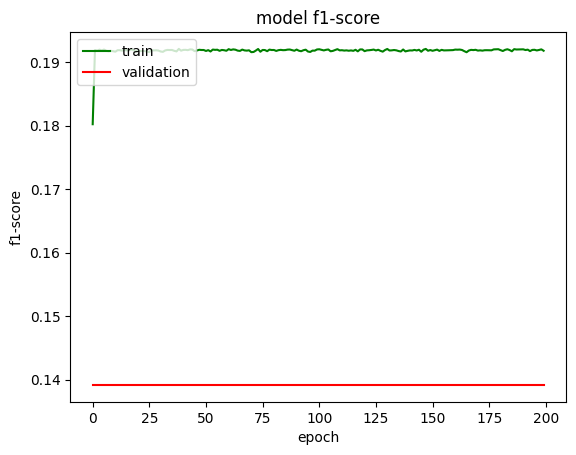

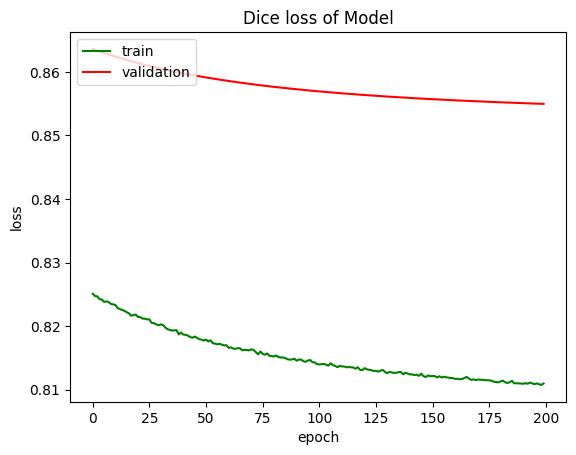

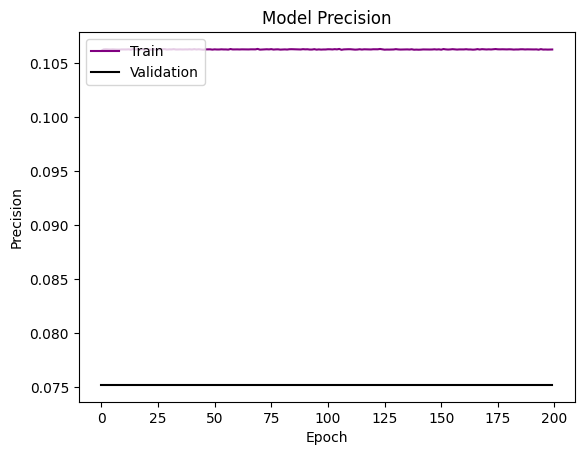

12/12 [==============================] - 3s 134ms/step - loss: 0.5645 - precision: 0.5789 - recall: 0.7274 - f1-score: 0.6154


In [10]:
size = X_train.shape[2]

img_bands = X_train.shape[3]

loss = dice_loss

filters = [32, 64]

lr = [10e-4]

batch_size = [32, 64]

epochs = 200

dic = {}

dic["model"] = []
dic["batch_size"] = []
dic["learning_rate"] = []
dic["filters"] = []

dic["precision_area"] = []
dic["recall_area"] = []
dic["f1_score_area"] = []

for fiilter in filters:
    for learning_rate in lr:
        for batch in batch_size:
            print('_______________________________________________________________________________')
            print('Filters: ', fiilter)
            print('Learning rate: ', learning_rate)
            print('Batch size: ', batch)

            def unet(lr, filtersFirstLayer, pretrained_weights=None, input_size=(size, size, img_bands)):
                inputs = Input(input_size)
                conv1 = Conv2D(filtersFirstLayer, 3, activation='relu', padding='same', kernel_initializer='glorot_normal')(inputs)
                conv1 = Conv2D(filtersFirstLayer, 3, activation='relu', padding='same', kernel_initializer='glorot_normal')(conv1)
                pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
                conv2 = Conv2D(filtersFirstLayer*2, 3, activation='relu', padding='same', kernel_initializer='glorot_normal')(pool1)
                conv2 = Conv2D(filtersFirstLayer*2, 3, activation='relu', padding='same', kernel_initializer='glorot_normal')(conv2)
                pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
                conv3 = Conv2D(filtersFirstLayer*4, 3, activation='relu', padding='same', kernel_initializer='glorot_normal')(pool2)
                conv3 = Conv2D(filtersFirstLayer*4, 3, activation='relu', padding='same', kernel_initializer='glorot_normal')(conv3)
                pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
                conv4 = Conv2D(filtersFirstLayer*8, 3, activation='relu', padding='same', kernel_initializer='glorot_normal')(pool3)
                conv4 = Conv2D(filtersFirstLayer*8, 3, activation='relu', padding='same', kernel_initializer='glorot_normal')(conv4)
                pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
                conv5 = Conv2D(filtersFirstLayer*16, 3, activation='relu', padding='same', kernel_initializer='glorot_normal')(pool4)
                conv5 = Conv2D(filtersFirstLayer*16, 3, activation='relu', padding='same', kernel_initializer='glorot_normal')(conv5)
                up6 = Conv2D(filtersFirstLayer*8, 2, activation='relu', padding='same', kernel_initializer='glorot_normal')(UpSampling2D(size=(2, 2))(conv5))
                merge6 = concatenate([conv4, up6], axis=3)
                conv6 = Conv2D(filtersFirstLayer*8, 3, activation='relu', padding='same', kernel_initializer='glorot_normal')(merge6)
                conv6 = Conv2D(filtersFirstLayer*8, 3, activation='relu', padding='same', kernel_initializer='glorot_normal')(conv6)
                up7 = Conv2D(filtersFirstLayer*4, 2, activation='relu', padding='same', kernel_initializer='glorot_normal')(UpSampling2D(size=(2, 2))(conv6))
                merge7 = concatenate([conv3, up7], axis=3)
                conv7 = Conv2D(filtersFirstLayer*4, 3, activation='relu', padding='same', kernel_initializer='glorot_normal')(merge7)
                conv7 = Conv2D(filtersFirstLayer*4, 3, activation='relu', padding='same', kernel_initializer='glorot_normal')(conv7)
                up8 = Conv2D(filtersFirstLayer*2, 2, activation='relu', padding='same', kernel_initializer='glorot_normal')(UpSampling2D(size=(2, 2))(conv7))
                merge8 = concatenate([conv2, up8], axis=3)
                conv8 = Conv2D(filtersFirstLayer*2, 3, activation='relu', padding='same', kernel_initializer='glorot_normal')(merge8)
                conv8 = Conv2D(filtersFirstLayer*2, 3, activation='relu', padding='same', kernel_initializer='glorot_normal')(conv8)
                up9 = Conv2D(filtersFirstLayer, 2, activation='relu', padding='same', kernel_initializer='glorot_normal')(UpSampling2D(size=(2, 2))(conv8))
                merge9 = concatenate([conv1, up9], axis=3)
                conv9 = Conv2D(filtersFirstLayer, 3, activation='relu', padding='same', kernel_initializer='glorot_normal')(merge9)
                conv9 = Conv2D(filtersFirstLayer, 3, activation='relu', padding='same', kernel_initializer='glorot_normal')(conv9)
                conv9 = Conv2D(2, 3, activation='relu', padding='same', kernel_initializer='glorot_normal')(conv9)
                conv10 = Conv2D(1, 1, activation='sigmoid')(conv9)
                model = Model(inputs, conv10)
                model.compile(optimizer=Adam(learning_rate=lr), loss=loss, metrics=metrics)
                if pretrained_weights:
                    model.load_weights(pretrained_weights)
                return model

            model = unet(filtersFirstLayer=fiilter, lr=learning_rate, input_size=(size, size, img_bands))

            early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
            model_checkpoint = tf.keras.callbacks.ModelCheckpoint(f'/content/drive/MyDrive/Lecture/Results/weights/unet_size_{size}_filters_{fiilter}_batch_size_{batch}_lr_{learning_rate}.hdf5', monitor='val_loss', mode='min', verbose=0, save_best_only=True, save_weights_only=True)

            history = model.fit(X_train, Y_train, batch_size=batch, epochs=epochs, validation_split=0.2, callbacks=[model_checkpoint, early_stop], verbose=1)

            plt.plot(history.history['f1-score'], color='green')
            plt.plot(history.history['val_f1-score'], color='red')
            plt.title('model f1-score')
            plt.ylabel('f1-score')
            plt.xlabel('epoch')
            plt.legend(['train', 'validation'], loc='upper left')
            plt.savefig(f"/content/drive/MyDrive/Major Project/Results/plots/unet_size_{size}_filters_{fiilter}_batch_size_{batch}_lr_{learning_rate}_f1_score.png")
            plt.show()

            plt.plot(history.history['loss'], color='green')
            plt.plot(history.history['val_loss'], color='red')
            plt.title('Dice loss of Model')
            plt.ylabel('loss')
            plt.xlabel('epoch')
            plt.legend(['train', 'validation'], loc='upper left')
            plt.savefig(f"/content/drive/MyDrive/Major Project/Results/plots/unet_size_{size}_filters_{fiilter}_batch_size_{batch}_lr_{learning_rate}_val_loss.png")
            plt.show()

            plt.plot(history.history['precision'], color='purple')
            plt.plot(history.history['val_precision'], color='black')
            plt.title('Model Precision')
            plt.ylabel('Precision')
            plt.xlabel('Epoch')
            plt.legend(['Train', 'Validation'], loc='upper left')
            plt.savefig(f"/content/drive/MyDrive/Major Project/Results/plots/unet_size_{size}_filters_{fiilter}_batch_size_{batch}_lr_{learning_rate}_precision.png")
            plt.show()

            load_unet = unet(filtersFirstLayer=fiilter, lr=learning_rate, input_size=(size, size, img_bands))
            load_unet.load_weights(f"/content/drive/MyDrive/Major Project/Results/weights/unet_size_{size}_filters_{fiilter}_batch_size_{batch}_lr_{learning_rate}.hdf5")
            res_1 = load_unet.evaluate(X_test, Y_test)

            dic["model"].append("Unet")
            dic["batch_size"].append(batch)
            dic["learning_rate"].append(learning_rate)
            dic["filters"].append(fiilter)
            dic["precision_area"].append(res_1[1])
            dic["recall_area"].append(res_1[2])
            dic["f1_score_area"].append(res_1[3])

            results = pd.DataFrame(dic)
            results.to_csv(f'/content/drive/MyDrive/Major Project/Results/csv/results_Unet.csv', index=False)


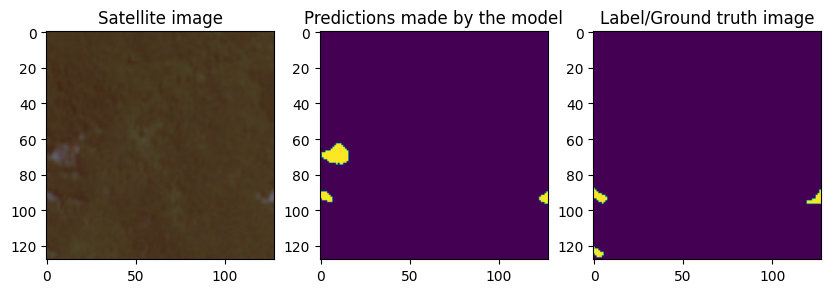

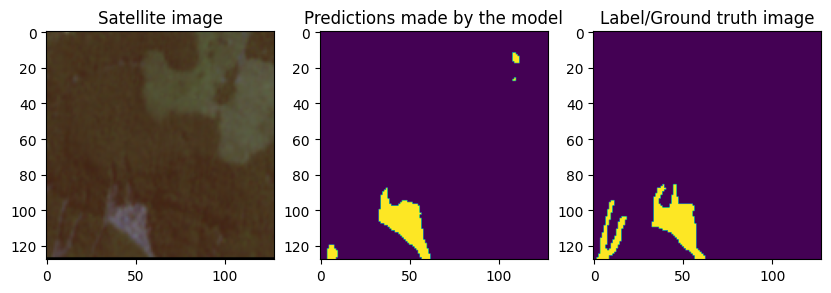

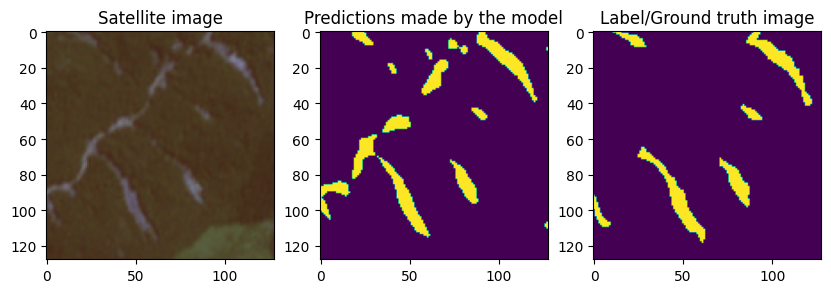

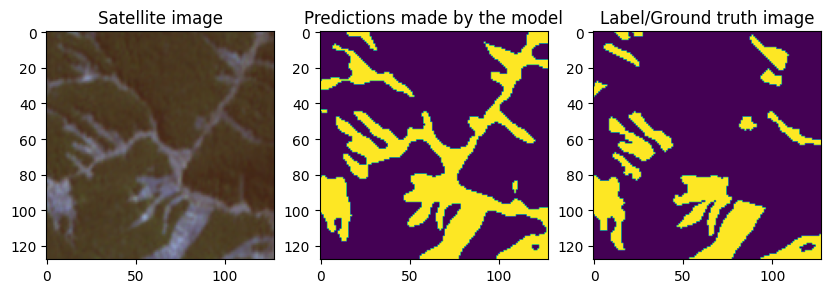

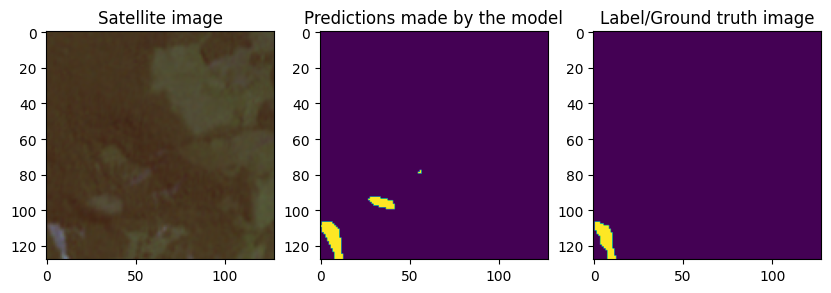

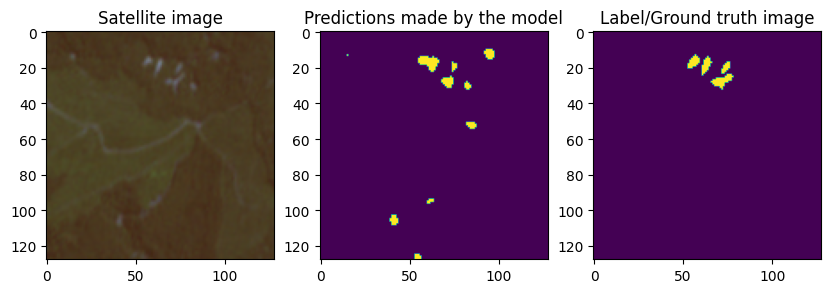

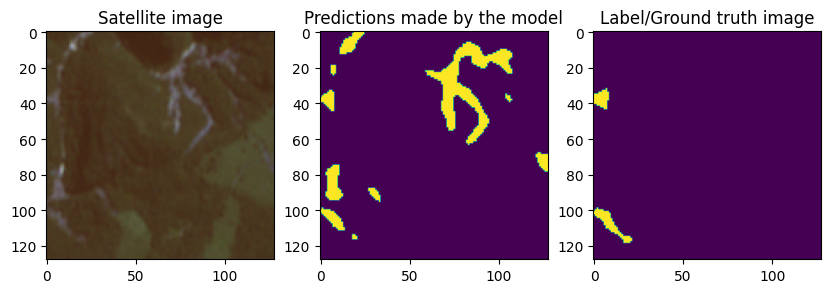

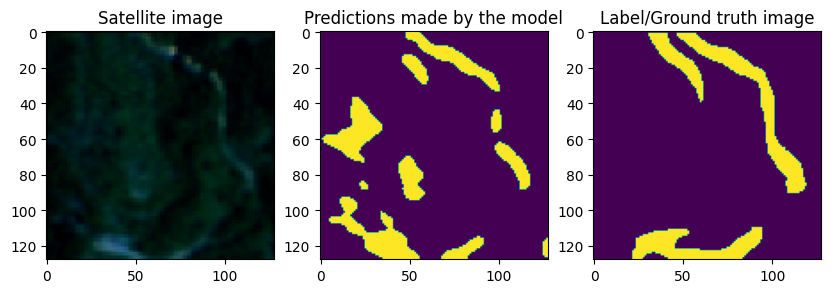

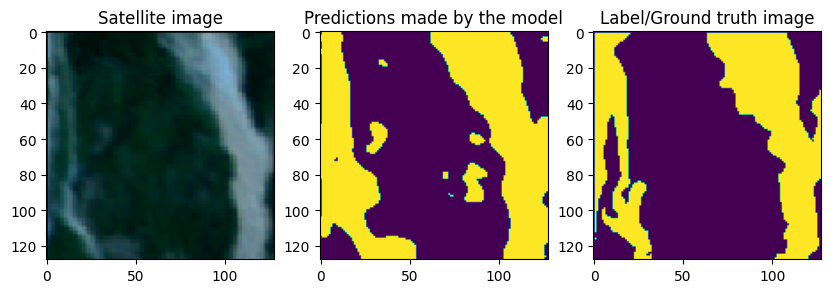

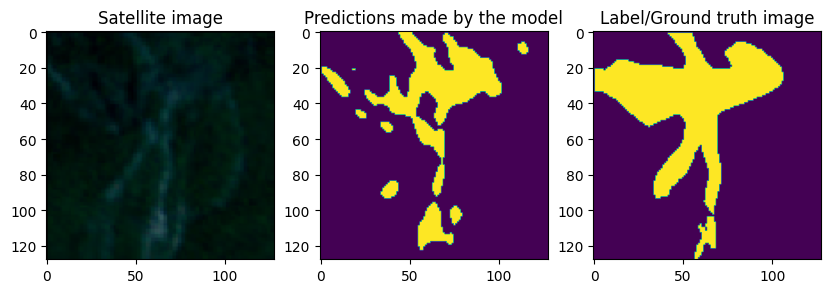

In [11]:
unet_best = unet(filtersFirstLayer=32, lr=0.0005, input_size=(size, size, img_bands))
unet_best.load_weights("/content/drive/MyDrive/Lecture/Results/weights/unet_size_128_filters_32_batch_size_32_lr_0.001.hdf5")

no = 10

for i in range(no):
    preds_train_1 = unet_best.predict(np.expand_dims(X_test[i], axis=0), verbose=0)
    preds_train_t1 = (preds_train_1 > 0.5).astype(np.uint8)
    f, axarr = plt.subplots(1, 3, figsize=(10, 10))
    axarr[0].imshow(X_test[i][:, :, :3])
    axarr[0].set_title("Satellite image")
    axarr[1].imshow(np.squeeze(preds_train_t1))
    axarr[1].set_title("Predictions made by the model")
    axarr[2].imshow(np.squeeze(Y_test[i]))
    axarr[2].set_title("Label/Ground truth image")


In [33]:
import rasterio
patchsize=128
overlap=24
nbands=4

image_data = rasterio.open("/content/drive/MyDrive/Major Project/Data/Inference/haiti.tif")
bands = [image_data.read(i+1) for i in range(nbands)]
Xuse = np.stack(bands,axis=2)
NROWS, NCOLS, NBANDS = Xuse.shape
Xuse = np.expand_dims(Xuse, axis=0)
print(f'Shape of the satellite image{Xuse.shape}')

Shape of the satellite image(1, 2830, 4879, 4)


In [34]:
_, Nrows, Ncols, NBands = Xuse.shape
if Ncols % patchsize != 0 or Nrows % patchsize != 0:
    print("The shape of input image is not divisible by patch size removing last pixels")
    newrow = int(Nrows / patchsize)
    newcol = int(Ncols / patchsize)
    Xuse = Xuse[:, :newrow * patchsize, :newcol * patchsize, :]
    print(f"the shape of new image is {Xuse.shape}")

_, Nrows, Ncols, NBands = Xuse.shape
itrcol = int((Ncols - patchsize) / (patchsize - overlap)) + 1
itrrow = int((Nrows - patchsize) / (patchsize - overlap)) + 1
totalmap = np.zeros((Nrows, Ncols), dtype=np.float32)
halfoverlap = int((overlap / 2))

for i in range(itrrow):
    if i == 0:
        striptop = i
        stripbottom = patchsize
    else:
        striptop = (patchsize - overlap) * i
        stripbottom = (patchsize - overlap) * i + patchsize
    for j in range(itrcol):
        if j == 0:
            stripleft = j
            stripright = patchsize
        else:
            stripleft = (patchsize - overlap) * j
            stripright = (patchsize - overlap) * j + patchsize
        Xuse_sub = Xuse[:, striptop:stripbottom, stripleft:stripright, :]
        #Initialising the model
        predictions = unet_best.predict_on_batch(Xuse_sub)





        if i == 0:
            filltop = int(i)
            fillbottom = int((patchsize - overlap / 2))
            if j == 0:
                fillleft = int(j)
                fillright = int((patchsize - overlap / 2))
                totalmap[filltop:fillbottom, fillleft:fillright] = np.squeeze(predictions[:, :-halfoverlap, :-halfoverlap, :][0], axis=2)
            else:
                fillleft = int((patchsize - overlap / 2) + (patchsize - overlap) * (j - 1))
                fillright = int((patchsize - overlap / 2) + (patchsize - overlap) * j)
                totalmap[filltop:fillbottom, fillleft:fillright] = np.squeeze(predictions[:, :-halfoverlap, halfoverlap:-halfoverlap, :][0], axis=2)
        else:
            filltop = int((patchsize - overlap / 2) + (patchsize - overlap) * (i - 1))
            fillbottom = int((patchsize - overlap / 2) + (patchsize - overlap) * i)
            if j == 0:
                fillleft = int(j)
                fillright = int((patchsize - overlap / 2))
                totalmap[filltop:fillbottom, fillleft:fillright] = np.squeeze(predictions[:, halfoverlap:-halfoverlap, :-halfoverlap, :][0], axis=2)
            else:
                fillleft = int((patchsize - overlap / 2) + (patchsize - overlap) * (j - 1))
                fillright = int((patchsize - overlap / 2) + (patchsize - overlap) * j)
                totalmap[filltop:fillbottom, fillleft:fillright] = np.squeeze(predictions[:, halfoverlap:-halfoverlap, halfoverlap:-halfoverlap, :][0], axis=2)


The shape of input image is not divisible by patch size removing last pixels
the shape of new image is (1, 2816, 4864, 4)


In [35]:
intmap = np.rint(totalmap)
predictions=intmap

save_file="/content/drive/MyDrive/Major Project/Results/predictions/haiti.tif"
with rasterio.Env():
    profile = image_data.profile
    profile.update(
        dtype=rasterio.int8,
        count=1,
        width= predictions.shape[-1],
        height= predictions.shape[-2],
        transform= image_data.transform*image_data.transform.scale(0.25,0.25),
        compress='lzw')
    with rasterio.open(save_file, 'w', **profile) as dst:
        dst.write(predictions.astype(rasterio.int8), 1)

In [36]:
import geopandas as gpd
from rasterio.features import shapes

mask=predictions==1
results = (
        {'properties': {'raster_val': v}, 'geometry': s}
        for i, (s, v)
        in enumerate(
            shapes(predictions, mask=mask, transform=image_data.transform)))

geoms = list(results)
gpd_polygonized_raster = gpd.GeoDataFrame.from_features(geoms)
gpd_polygonized_raster = gpd_polygonized_raster.set_crs(image_data.crs)

gpd_polygonized_raster.to_file("/content/drive/MyDrive/Major Project/Results/predictions/haiti.shp")
print("Shapefile conversion successful !!!")

Shapefile conversion successful !!!


In [37]:
from matplotlib import pyplot as plt
import rasterio

print("This is the satellite image of the affected region in Haiti")
src = rasterio.open("/content/drive/MyDrive/Major Project/Data/Inference/haiti.tif")

# Read bands 1, 2, and 3
red = src.read(3)
green = src.read(2)
blue = src.read(1)

# Stack bands
rgb = np.stack((red, green, blue), axis=-1)

# Normalize bands into 0.0 - 1.0 scale
rgb_norm = (rgb - np.min(rgb)) / (np.max(rgb) - np.min(rgb))

fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(rgb_norm)
plt.show()

# from matplotlib import pyplot as plt
# import rasterio

# print("This is the satellite image of the affected region in Haiti")
# src = rasterio.open("/content/drive/MyDrive/Major Project/Data/Inference/haiti.tif")

# # Read bands 4, 2, and 1
# red = src.read(4)
# green = src.read(2)
# blue = src.read(1)

# # Stack bands
# rgb = np.stack((red, green, blue), axis=-1)

# # Normalize bands into 0.0 - 1.0 scale
# rgb_norm = (rgb - np.min(rgb)) / (np.max(rgb) - np.min(rgb))

# fig, ax = plt.subplots(figsize=(20, 20))
# ax.imshow(rgb_norm)
# plt.show()



Output hidden; open in https://colab.research.google.com to view.

In [39]:
from matplotlib import pyplot as plt
import rasterio

print("This is the satellite image of the affected region in Haiti")
src = rasterio.open("/content/drive/MyDrive/Major Project/Data/Inference/haiti.tif")

red = src.read(4)
green = src.read(2)
blue = src.read(1)

rgb = np.stack((red, green, blue), axis=-1)

rgb_norm = (rgb - np.min(rgb)) / (np.max(rgb) - np.min(rgb))

fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(rgb_norm)
plt.show()


Output hidden; open in https://colab.research.google.com to view.

These are the predictions.......


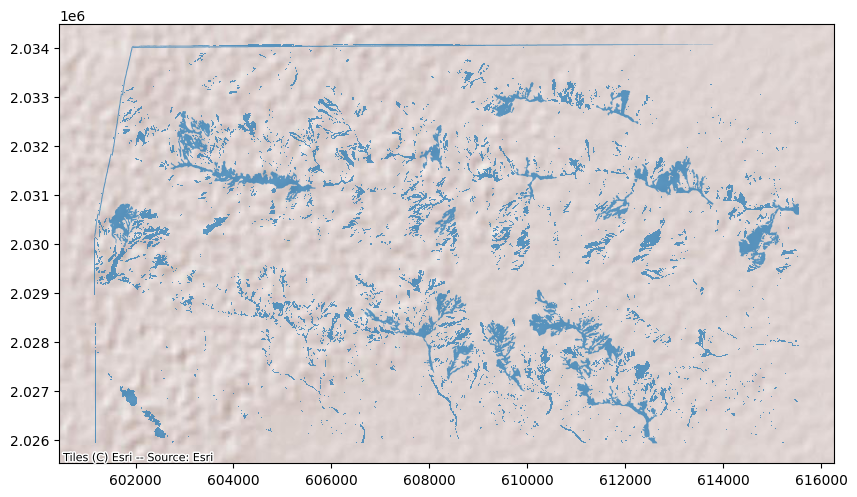

In [27]:
import contextily as cx
print("These are the predictions.......")
df = gpd.read_file("/content/drive/MyDrive/Major Project/Results/predictions/haiti.shp")
df_wm = df.to_crs(epsg=32618)
ax=df_wm.plot(legend=True,figsize=(10, 10), alpha=0.7)
cx.add_basemap(ax,source=cx.providers.Esri.WorldShadedRelief)

In [40]:
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt

print("This is the satellite image of the affected region in Haiti")

src = rasterio.open("/content/drive/MyDrive/Major Project/Data/Inference/haiti.tif")

red = src.read(4)
green = src.read(2)
blue = src.read(1)

rgb = np.stack((red, green, blue), axis=-1)

rgb_norm = (rgb - np.min(rgb)) / (np.max(rgb) - np.min(rgb))

fig, ax = plt.subplots(figsize=(20, 20))

ax.imshow(rgb_norm, extent=[src.bounds[0], src.bounds[2], src.bounds[1], src.bounds[3]])

df = gpd.read_file("/content/drive/MyDrive/Major Project/Results/predictions/haiti.shp")

df_wm = df.to_crs(src.crs)

df_wm.plot(ax=ax, edgecolor='yellow', facecolor='none')

plt.show()

Output hidden; open in https://colab.research.google.com to view.